# Comic Book Recommendation System

### Sprint 03
***

In [1]:
# Importing all the required dependencies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

# Exploratory Data Analysis
***

In [2]:
data = pd.read_csv("./Marvel_Comics.csv") # Loading data into a pandas dataframe.
data.head(5)

,comic_name,active_years,issue_title,publish_date,issue_description,penciler,writer,cover_artist,Imprint,Format,Rating,Price
0,A Year of Marvels: April Infinite Comic (2016),(2016),A Year of Marvels: April Infinite Comic (2016) #1,"April 01, 2016",The Infinite Comic that will have everyone tal...,Yves Bigerel,Yves Bigerel,Jamal Campbell,Marvel Universe,Infinite Comic,Rated T+,Free
1,A Year of Marvels: August Infinite Comic (2016),(2016),A Year of Marvels: August Infinite Comic (2016...,"August 10, 2016","It’s August, and Nick Fury is just in time to ...",Jamal Campbell,"Chris Sims, Chad Bowers",NaN,Marvel Universe,Infinite Comic,NaN,Free
2,A Year of Marvels: February Infinite Comic (2016),(2016),A Year of Marvels: February Infinite Comic (20...,"February 10, 2016",Join us in a brand new Marvel comics adventure...,"Danilo S. Beyruth, M Mast",Ryan North,NaN,Marvel Universe,Infinite Comic,Rated T+,Free
3,A Year of Marvels: July Infinite Comic (2016),(2016),A Year of Marvels: July Infinite Comic (2016) #1,"June 29, 2016",Celebrating the Fourth of July is complicated ...,Juanan Ramirez,Chuck Wendig,Jamal Campbell,Marvel Universe,Infinite Comic,NaN,Free
4,A Year of Marvels: June Infinite Comic (2016),(2016),A Year of Marvels: June Infinite Comic (2016) #1,"June 15, 2016",Sam Alexander’s finding it hard to cope with t...,Diego Olortegui,Paul Allor,Jamal Campbell,Marvel Universe,Infinite Comic,NaN,Free


In [55]:
print(len(data)) # Checking for the length of the data

34992


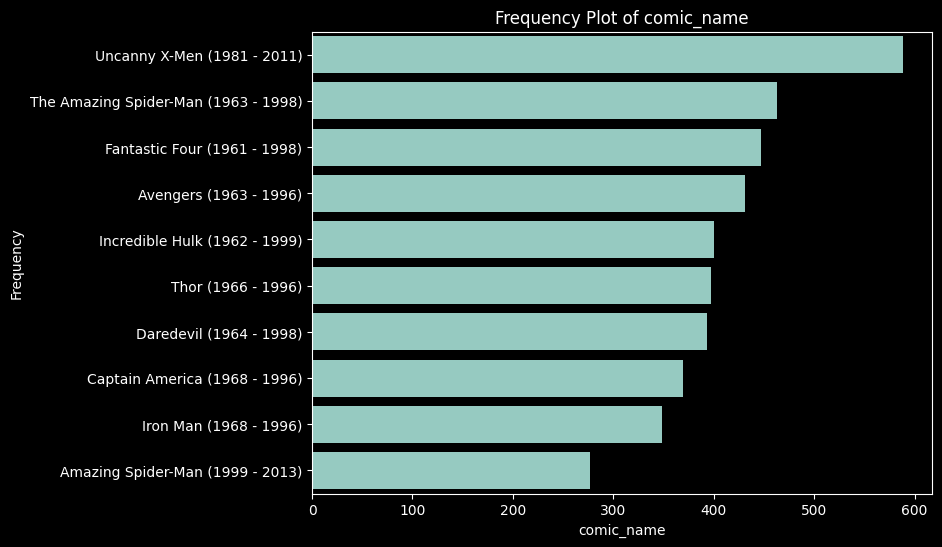

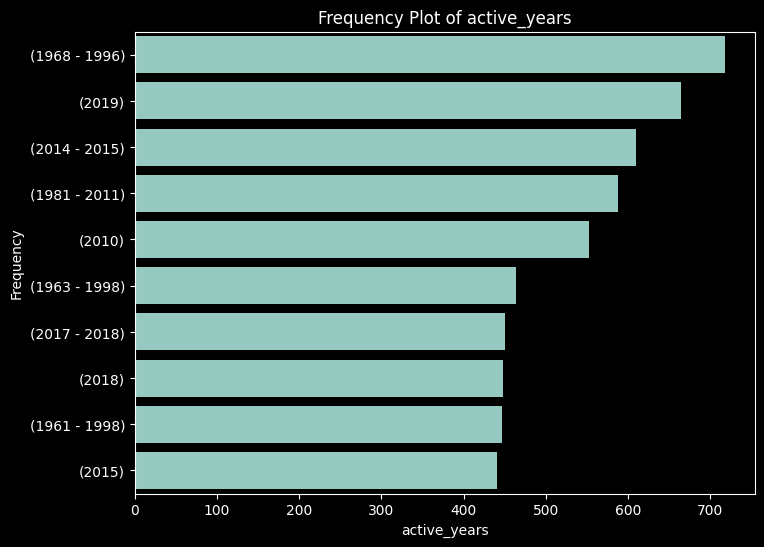

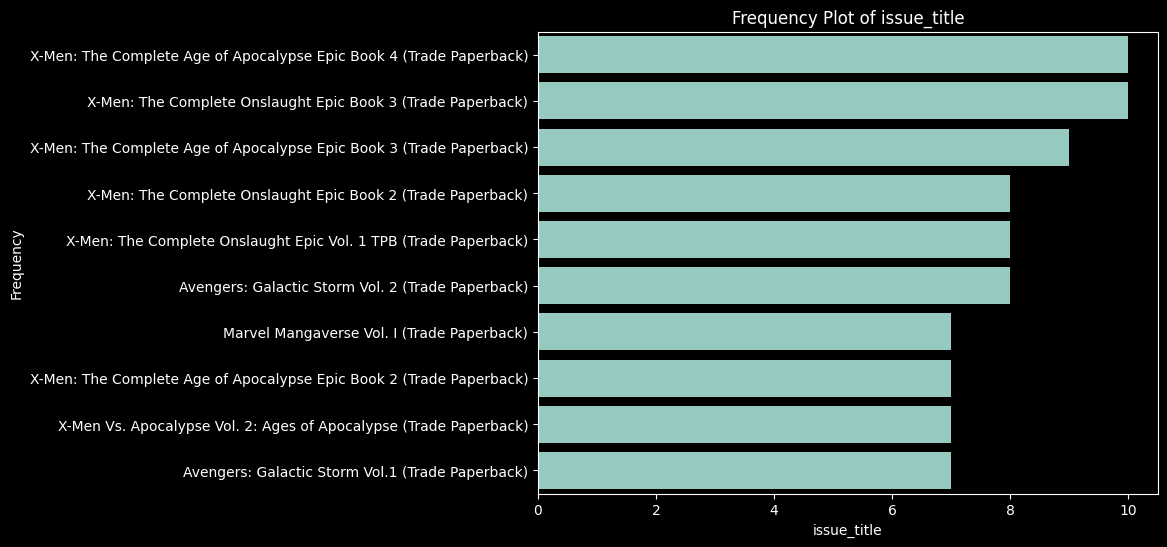

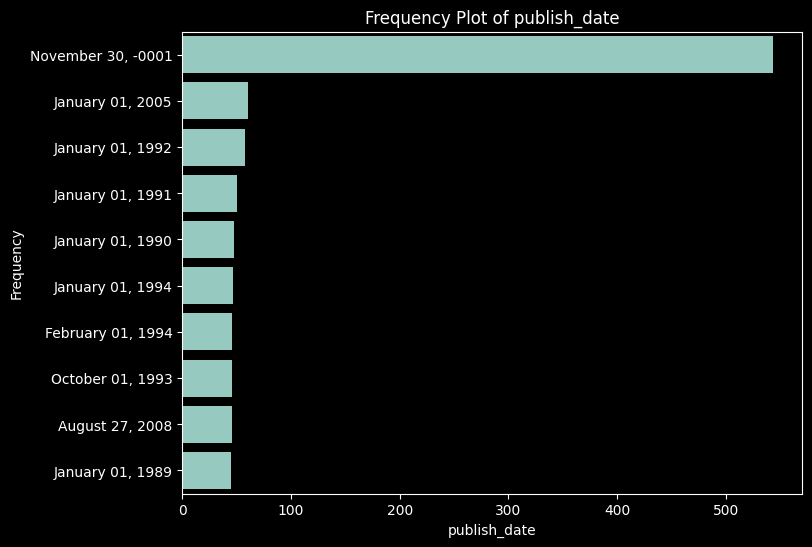

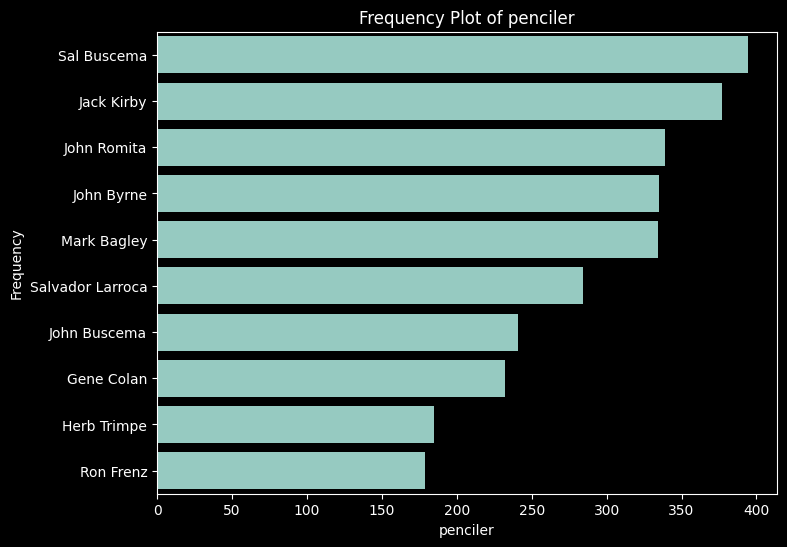

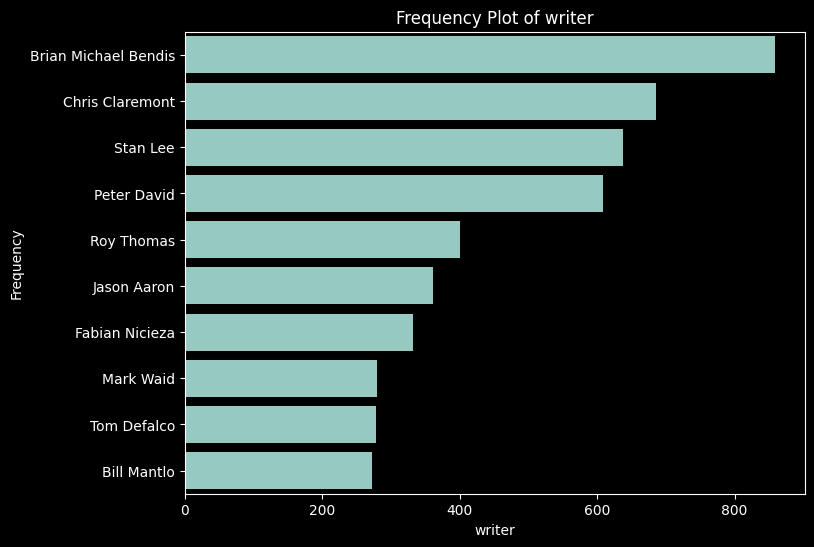

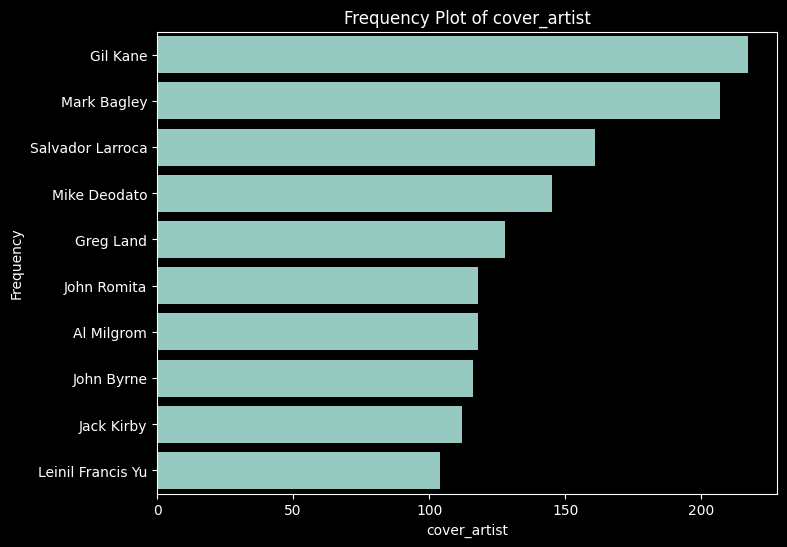

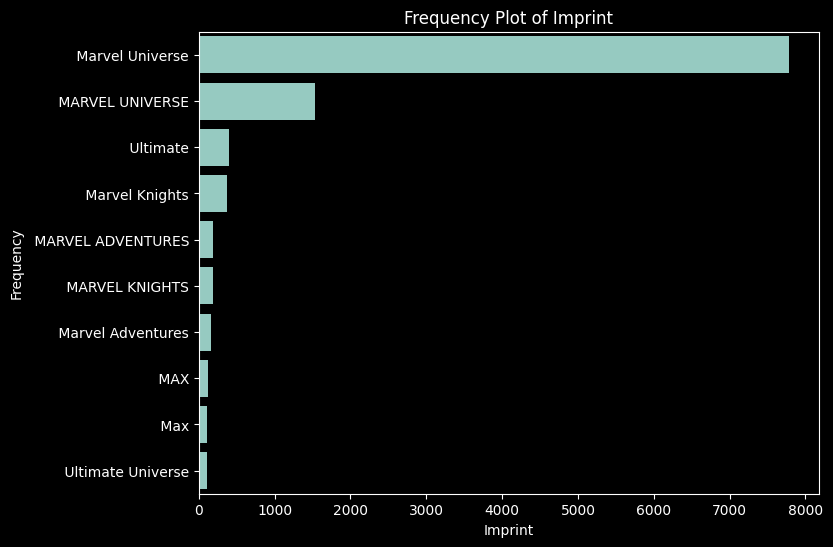

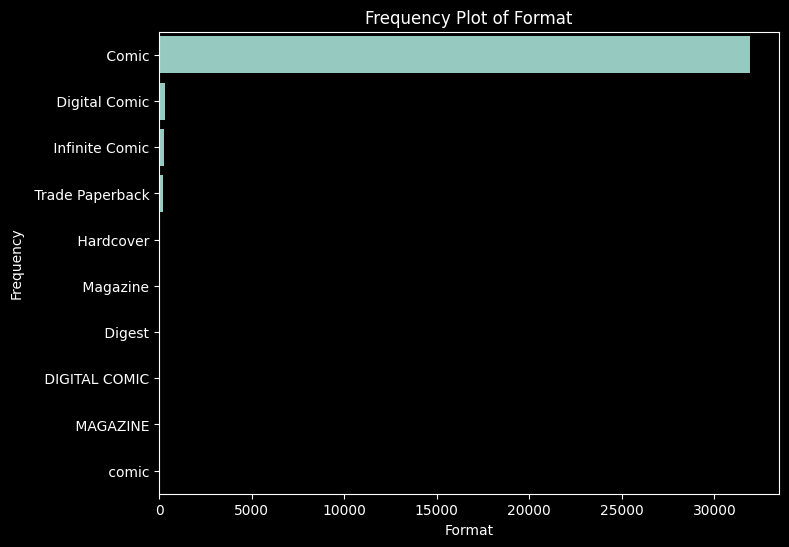

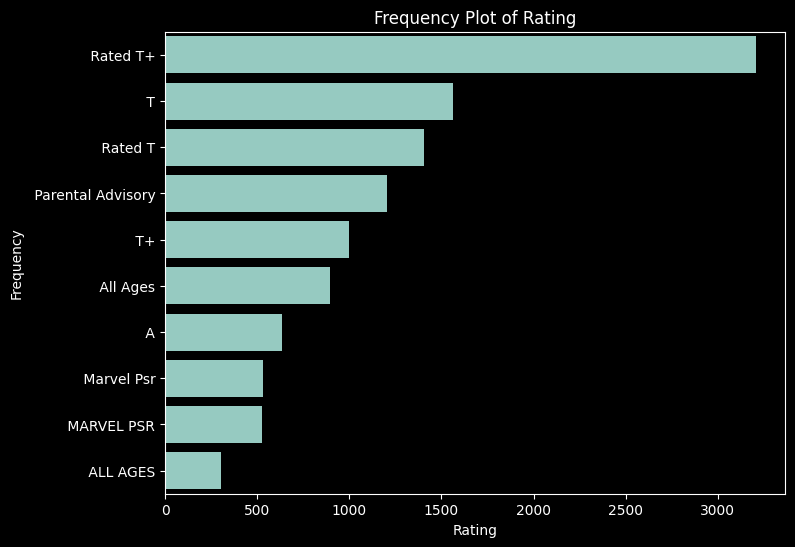

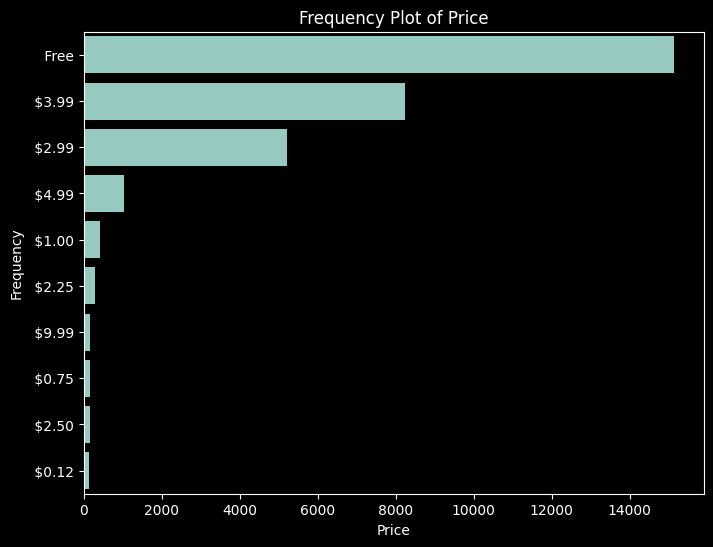

In [54]:
# Plotting out the frequency of the values in each column except for issue_description
for column in data.drop('issue_description', axis=1).columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=data, y=column, order=data[~(data[column]=='None')][column].value_counts().iloc[:10].index)
    plt.title(f'Frequency Plot of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

In [4]:
data['issue_description'] = data['issue_description'].apply(lambda x: str(x).lower()) # Converting all the characters to lower case

## Model Creation
***

In [5]:
tfidf = TfidfVectorizer(stop_words='english') # Creating a tf-idf vectorizer

In [6]:
# Creating a tf_idf matrix and getting the cosine-similarity scores
tfidf_matrix = tfidf.fit_transform(data['issue_description'].tolist())

cosine_sim = linear_kernel(tfidf_matrix,tfidf_matrix)
indices = pd.Series(data.index, index=data['comic_name']).drop_duplicates()
indices[:10]

comic_name
A Year of Marvels: April Infinite Comic (2016)        0
A Year of Marvels: August Infinite Comic (2016)       1
A Year of Marvels: February Infinite Comic (2016)     2
A Year of Marvels: July Infinite Comic (2016)         3
A Year of Marvels: June Infinite Comic (2016)         4
A Year of Marvels: March Infinite Comic (2016)        5
A Year of Marvels: May Infinite Comic (2016)          6
A Year of Marvels: November Infinite Comic (2016)     7
A Year of Marvels: October Infinite Comic (2016)      8
A Year of Marvels: September Infinite Comic (2016)    9
dtype: int64

In [26]:
# Creating a function to get reccomendations based on the similarity scores
def get_recommendations(title, ind=indices ,cosine_sim=cosine_sim):
    idx = ind[title][0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]
    comic_indices = [i[0] for i in sim_scores]
    return data['comic_name'].iloc[comic_indices]

In [98]:
comic_name = data['comic_name'].sample(1).values[0]
comic_name

'Captain America: First Vengeance (2011)'

In [97]:
get_recommendations(comic_name)

13766                Journey Into Mystery (2011 - 2013)
25111    Stormbreaker: The Saga of Beta Ray Bill (2005)
27616                                Thor (1966 - 1996)
27744                                Thor (1966 - 1996)
25110    Stormbreaker: The Saga of Beta Ray Bill (2005)
25106    Stormbreaker: The Saga of Beta Ray Bill (2005)
25105    Stormbreaker: The Saga of Beta Ray Bill (2005)
27729                                Thor (1966 - 1996)
19182                                Nova (2013 - 2015)
30052           Uncanny Avengers: Ultron Forever (2015)
Name: comic_name, dtype: object